## 뉴스 카테고리 다중분류
- 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.
- Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.
- 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.

In [1]:
# 모듈 불러오기  
import tensorflow
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

- 사용 데이터
    - 로이터 뉴스 데이터
    - 클래스 46개
    - 해당 뉴스가 어느 카테고리에 예측하기 위한 데이터
    - tensorflow.keras.datasets

### 1. 모든 단어 사용

In [84]:
# 모든 단어를 사용하는 경우
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data(num_words=None, test_split=0.2)

### 2. 빈도수 상위 5,000개의 단어만 사용

In [85]:
# 빈도수 상위 5,000개의 단어만 사용하는 경우
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

### 3. 직접 단어 개수를 설정해서 사용
 - 최소 3가지 경우 이상을 실험해 보기를 권합니다.

In [228]:
# 10000
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

In [87]:
# 20000
(x_train_20000, y_train_20000), (x_test_20000, y_test_20000) = reuters.load_data(num_words=20000, test_split=0.2)

In [16]:
print('훈련 샘플의 수: {}'.format(len(x_train_all)))
print('테스트 샘플의 수: {}'.format(len(x_test_all)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [18]:
# 정수 레이블 출력
print(x_train_all[0])
print(x_train_all[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [19]:
# 클래스 수 출력
num_classes = max(y_train_all) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


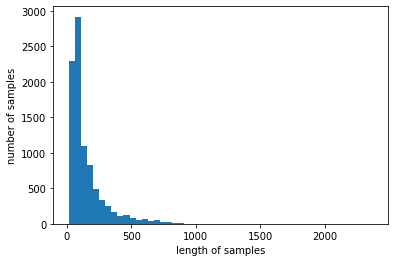

In [20]:
# 데이터 분포 확인하기
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_all)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_all))/len(x_train_all)))

plt.hist([len(s) for s in x_train_all], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 길이가 가장 긴 뉴스의 길이는 2,376
- 평균 길이는 145
- 시각화된 그래프의 분포로 봤을 때 500~1,000 사이의 길이

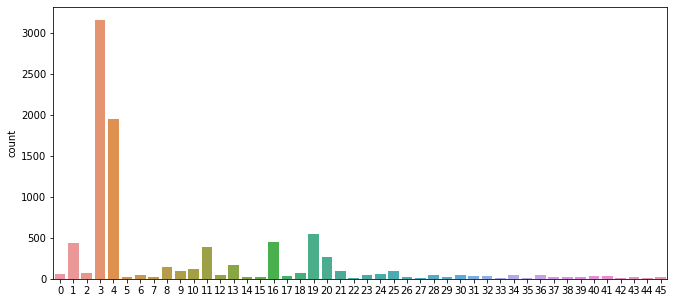

In [21]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_all)
plt.show()

-  뉴스 데이터는 3번, 4번 클래스가 대부분을 차지
-  19번, 16번, 1번, 11번 등이 높은 분포

In [229]:
# 각 클래스 빈도수 출력
unique_elements, counts_elements = np.unique(y_train_all, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


- 3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재
- 9번 클래스가 549개

In [230]:
# 단어장 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

- 로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공한다
- 이 데이터의 단어장(Vocabulary)

In [231]:
print(word_index['the'])
print(word_index['a'])

1
7


In [232]:
def word_to_index(word_to_index):
    # 실제 인코딩 인덱스는 제공된 word_to_index 기준으로 3씩 뒤로 밀려 있다
    word_to_index ={k:(v+3) for k,v in word_to_index.items()}

    # Hannanum
    # 처음 몇개의 인덱스는 사전 정의
    word_to_index["<PAD>"] = 0
    word_to_index["<BOS>"] = 1
    word_to_index["<UNK>"] = 2
    word_to_index["<UNUSED>"] = 3
    index_to_word = {index:word for word, index in word_to_index.items()}
    
    return word_to_index

In [233]:
word_to_index= word_to_index(word_index)

- 수치 데이터를 텍스트 데이터로 돌리기 위한 index to word 생성
- < pad >, < sos >, < unk > 라는 토큰이  0번, 1번, 2번에 매핑된 번호이기 때문에 index to word를 만들 때 3을 더해주어야 한다

In [240]:
# 수치 데이터를 텍스트 데이터로 돌리기 위한 index to word 생성
index_to_word = { index : word for word, index in word_to_index.items() }
print(index_to_word[4])
print(index_to_word[20000])

the
hirschberg


In [241]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train_all[1]]))

<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3


In [242]:
# data list
data_list_train = [(x_train_all, y_train_all),(x_train_5000, y_train_5000),(x_train_10000, y_train_10000),(x_train_20000, y_train_20000)]
data_list_test = [(x_test_all, y_test_all),(x_test_5000, y_test_5000),(x_test_10000, y_test_10000),(x_test_20000, y_test_20000)]
print(len(data_list_train[0][0]))
print(len(data_list_test[0][0]))

8982
2246


In [243]:
def news_data_to_text(x_train,x_test):
    decoded_train = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        decoded_train.append(t)
    x_train = decoded_train
    
    decoded_test = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        decoded_test.append(t)

    x_test = decoded_test
    print("x_train length : ",len(x_train))
    print("x_text length : ",len(x_test))
    return x_train, x_test
    

In [244]:
count = 0
for (xtrain,ytrain),(xtest,ytest) in zip(data_list_train, data_list_test):
    data_list_train[count][0][::], data_list_test[count][0][::] = news_data_to_text(xtrain,xtest)
    count+=1

x_train length :  8982
x_text length :  2246
x_train length :  8982
x_text length :  2246
x_train length :  8982
x_text length :  2246
x_train length :  8982
x_text length :  2246


### 벡터화

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
def TF_IDF(x_train,x_test, x_train_num='all'):
    # DTN
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    print(x_train_num)
    print("DTM",x_train_dtm.shape)

    # TF-IDF , DTM을 입력으로 받는다
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    print("TF-IDF",tfidfv.shape)
    
    x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
    
    return x_train_dtm ,tfidfv, x_test_dtm, tfidfv_test

In [32]:
x_train_dtm_all , tfidfv_all, x_test_dtm_all, tfidfv_test_all =  TF_IDF(x_train_all,x_test_all,"all")
x_train_dtm_5000 , tfidfv_5000, x_test_dtm_5000, tfidfv_test_5000 =  TF_IDF(x_train_5000,x_test_5000,"5000")
x_train_dtm_10000 , tfidfv_10000, x_test_dtm_10000, tfidfv_test_10000 =  TF_IDF(x_train_10000,x_test_10000,"10000")
x_train_dtm_20000 , tfidfv_20000, x_test_dtm_20000, tfidfv_test_20000 =  TF_IDF(x_train_20000,x_test_20000,"20000")

all
DTM (8982, 26506)
TF-IDF (8982, 26506)
5000
DTM (8982, 4867)
TF-IDF (8982, 4867)
10000
DTM (8982, 9670)
TF-IDF (8982, 9670)
20000
DTM (8982, 18479)
TF-IDF (8982, 18479)


-  DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문에 num_words를 설정한 수보다 조금 적은 수의 열 개수를 갖는다

### 모델

In [33]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [34]:
# 모델 선언 - for문에서 초기화 하기 위함
def MNB():
    return MultinomialNB()

def CNB():
    return ComplementNB()

def SGD():
    return SGDClassifier(penalty='l2',max_iter=2000)

def lr():
    return LogisticRegression(C=10000, penalty='l2', max_iter=2000)

def lsvc():
    return LinearSVC(C=10000, penalty='l2', max_iter=2000, dual=False)

def tree():
    return DecisionTreeClassifier(max_depth=5, random_state=0)

def forest():
    return RandomForestClassifier(max_depth=5, random_state=0)

def grbt():
    return GradientBoostingClassifier(random_state=0) # verbose=3
    


In [35]:
# test model function
def test_model(model, tfidfv, tfidfv_test, y_train, y_test):
    print("model: ",type(model).__name__)
    model.fit(tfidfv, y_train)
    
    predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    acc = accuracy_score(y_test, predicted) * 100
    return model, acc

In [320]:
# model function list
model_list = [MNB,CNB,SGD,lr,lsvc,tree,forest,grbt]

# y data list
y_list = [(y_train_all,y_test_all),(y_train_5000,y_test_5000),(y_train_10000,y_test_10000),(y_train_20000,y_test_20000)]

# tfidfv ,tfidfv test list
tfidf_list = [(tfidfv_all,tfidfv_test_all),(tfidfv_5000,tfidfv_test_5000),(tfidfv_10000,tfidfv_test_10000),(tfidfv_20000,tfidfv_test_20000)]

# num words list
nums_word = ['all','5000','10000','20000']

In [210]:

accuracy = []
# test model all
for create_model in  model_list:
    print("=========================================================")
    for (y_train,y_test),(tfidfv,tfidfv_test),num in zip(y_list,tfidf_list,nums_word):
        print("--------------------------------------------------")
        print(f"nums word {num}")
            
        # model Initialize
        model = create_model()
        _, acc = test_model(model, tfidfv, tfidfv_test, y_train, y_test)
        accuracy.append(acc)
        

--------------------------------------------------
nums word all
model:  MultinomialNB
정확도: 0.5997328584149599
--------------------------------------------------
nums word 5000
model:  MultinomialNB
정확도: 0.6731967943009796
--------------------------------------------------
nums word 10000
model:  MultinomialNB
정확도: 0.6567230632235085
--------------------------------------------------
nums word 20000
model:  MultinomialNB
정확도: 0.6193232413178985
--------------------------------------------------
nums word all
model:  ComplementNB
정확도: 0.7649154051647373
--------------------------------------------------
nums word 5000
model:  ComplementNB
정확도: 0.7707034728406055
--------------------------------------------------
nums word 10000
model:  ComplementNB
정확도: 0.7707034728406055
--------------------------------------------------
nums word 20000
model:  ComplementNB
정확도: 0.7671415850400712
--------------------------------------------------
nums word all
model:  SGDClassifier
정확도: 0.842831700801

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8032056990204809
--------------------------------------------------
nums word 10000
model:  LogisticRegression


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8107747105966162
--------------------------------------------------
nums word 20000
model:  LogisticRegression


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8161175422974176
--------------------------------------------------
nums word all
model:  LinearSVC
정확도: 0.8063223508459484
--------------------------------------------------
nums word 5000
model:  LinearSVC


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7943009795191451
--------------------------------------------------
nums word 10000
model:  LinearSVC
정확도: 0.7991985752448798
--------------------------------------------------
nums word 20000
model:  LinearSVC
정확도: 0.8032056990204809
--------------------------------------------------
nums word all
model:  DecisionTreeClassifier
정확도: 0.5574354407836153
--------------------------------------------------
nums word 5000
model:  DecisionTreeClassifier
정확도: 0.5471950133570792
--------------------------------------------------
nums word 10000
model:  DecisionTreeClassifier
정확도: 0.5525378450578807
--------------------------------------------------
nums word 20000
model:  DecisionTreeClassifier
정확도: 0.5569902048085486
--------------------------------------------------
nums word all
model:  RandomForestClassifier
정확도: 0.4839715048975957
--------------------------------------------------
nums word 5000
model:  RandomForestClassifier
정확도: 0.553873552983081
---------------------------------

모델 중에 Gradient 모델을 가지고 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해본다

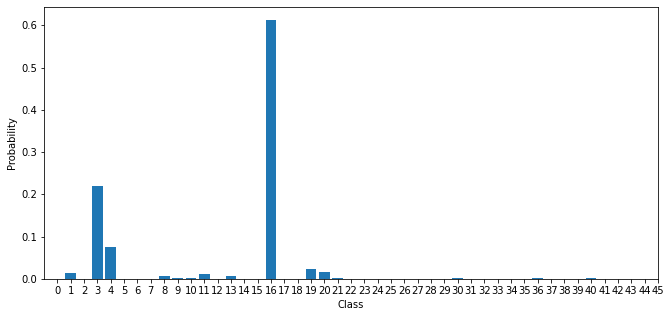

In [211]:
# gradient boosting 모델
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [212]:
model.predict(tfidfv_test[3])

array([16])

- 결과적으로 SGD가 가장 좋은 성능을 보였고 다음에 logistic regression과 LinearSVC가 80% 이상의 성능을 보였다.
- random forest,decision tree 모델은 별로 좋은 성능을 보이지는 못했다.
- 훈련 시간은 SGD , MultinomialNB, ComplementNB가 가장 빨랐다.
- 데이터같은 경우에는 빈도수 상위 10000를 사용하는 경우가 대체적으로 모두 가장 높은 편에 속했다.
- 따라서 8 개를 훈련한 결과를 가지고 가장 좋은 성능을 내는 3가지 모델과 데이터는 빈도수 상위 10000를 사용한 경우를 가지고 Voting을 진행한다.

### 보팅(Voting)

- 이전에 모델 8개를 훈련한 결과를 가지고 가장 좋은 성능을 내는 모델 3가지
    - LogisticRegression
    - SGDClassifier
    - LinearSVC

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier

# Initialize individual classifiers
lr_classifier = LogisticRegression(penalty='l2', max_iter=1000)
sgd_classifier = SGDClassifier(loss='log',penalty='l2', max_iter=1000)
gbc_classifier = GradientBoostingClassifier(random_state=0) # verbose=3
# cnb_classifier = ComplementNB()

# Create a list of tuples containing classifier names and classifier instances
classifiers = [('lr', lr_classifier), ('sgd', sgd_classifier), ('gbc', gbc_classifier)]

# Initialize the Voting Classifier
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')
voting_classifier = voting_classifier.fit(tfidfv_10000, y_train_10000)

In [66]:
print(tfidfv_test_10000.shape)
y_test_10000.shape

(2246, 9670)


(2246,)

In [63]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

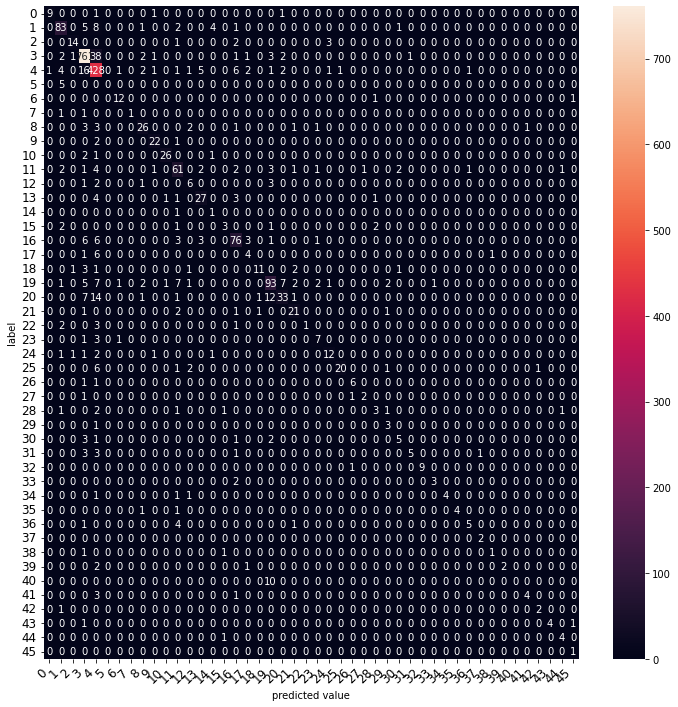

In [64]:
graph_confusion_matrix(voting_classifier, tfidfv_test_10000, y_test_10000)

In [67]:
predicted = voting_classifier.predict(tfidfv_test_10000)

print("정확도:", accuracy_score(y_test_10000, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


### F1-Score, Confusion Matrix

- 8개의 모델 중에 vocabulary size에 따라 머신러닝 모델의 성능 변화가 비교적 크게 있었던 MultinomialNB를 가지고 Confusion matrix를 구해본다
- MultinomialNB의 알고리즘 특성과 왜 이런 성능 변화를 보였는지에 대해 살펴본다

In [321]:
m_acc = []
for (y_train,y_test),(tfidfv,tfidfv_test),num in zip(y_list,tfidf_list,nums_word):
    print("--------------------------------------------------")
    print(f"nums word {num}")
    acc = 0
    # model declare
    model = MultinomialNB()
    result,acc = test_model(model, tfidfv, tfidfv_test, y_train, y_test)
    m_acc.append(acc)
    print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))
    #plt.plot(acc, label = f"nums word {num}")
    print("--------------------------------------------------")

--------------------------------------------------
nums word all
model:  MultinomialNB
정확도: 0.5997328584149599
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00 

In [322]:
print(m_acc)

[59.97328584149599, 67.31967943009795, 65.67230632235085, 61.93232413178985]


<AxesSubplot:>

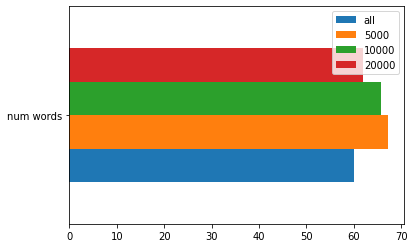

In [339]:
pd.DataFrame(np.array([m_acc]).reshape(-1,1).T,index= ['num words'], columns = ['all','5000','10000','20000']).plot.barh(width = 0.8)

- 왜 이런 성능 변화가 있었을까?
    - 벡터의 차원이 증가하면 해당 공간이 점점 희소해지는데, 이는 모델이 학습하기 어렵게 만든다. 특히나 데이터가 한정적인 경우에는 차원이 증가할수록 데이터 간의 거리가 멀어져 유사성을 파악하기 어려워진다.

    - 단어의 수가 증가하면 문서-단어 행렬이 더 희소해지는 경향이 있다. 이러한 희소성은 모델이 노이즈에 민감해지고, 학습 데이터에만 지나치게 의존하여 새로운 데이터에 대한 일반화 능력을 감소시킬 수 있다.

    - NumWords가 증가하면서 특히 데이터가 한정적인 경우, 각각의 단어에 대한 충분한 학습 데이터가 확보되지 않을 수 있다. 이로 인해 모델은 각 단어의 다양한 사용 방법을 학습하기 어려워진다.

## 4. 딥러닝 모델과 비교해 보기
-  감정 분석 등에 사용했던 RNN이나 1-D CNN 
-  공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

In [246]:
lr_classifier = LogisticRegression(penalty='l2', max_iter=1000)
sgd_classifier = SGDClassifier(penalty='l2',max_iter=1000)
svc_classifier =  LinearSVC(C=10000, penalty='l2', max_iter=1000, dual=False)


lr_model, acc_lr = test_model(lr_classifier, tfidfv_10000, tfidfv_test_10000, y_train_10000, y_test_10000)
sgd_model , acc_sgd = test_model(sgd_classifier, tfidfv_10000, tfidfv_test_10000, y_train_10000, y_test_10000)
svc_model , acc_svc = test_model(svc_classifier, tfidfv_10000, tfidfv_test_10000, y_train_10000, y_test_10000)

model:  LogisticRegression
정확도: 0.7951914514692787
model:  SGDClassifier
정확도: 0.8432769367764915
model:  LinearSVC
정확도: 0.8014247551202137


In [340]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)


# maxlen 문장 평균 길이
max_sequence_length = 700 
x_train = pad_sequences(x_train,value=word_to_index["<PAD>"],
                                                        padding='post', maxlen=max_sequence_length)
x_test = pad_sequences(x_test,value=word_to_index["<PAD>"],
                                                        padding='post', maxlen=max_sequence_length)

# CNN1D model
vocab_size = 10000
word_vector_dim = 250

model = Sequential()
model.add(Embedding(vocab_size, word_vector_dim, input_length=max_sequence_length))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))

num_classes = 46
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 20  
batch_size = 256  
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)




Epoch 1/20
32/32 [==============================] - 2s 36ms/step - loss: 3.3394 - accuracy: 0.3465 - val_loss: 2.9392 - val_accuracy: 0.3315
Epoch 2/20
32/32 [==============================] - 1s 29ms/step - loss: 2.5400 - accuracy: 0.3540 - val_loss: 2.2857 - val_accuracy: 0.3315
Epoch 3/20
32/32 [==============================] - 1s 30ms/step - loss: 1.9713 - accuracy: 0.4732 - val_loss: 1.8336 - val_accuracy: 0.5239
Epoch 4/20
32/32 [==============================] - 1s 30ms/step - loss: 1.6503 - accuracy: 0.5707 - val_loss: 1.6796 - val_accuracy: 0.5606
Epoch 5/20
32/32 [==============================] - 1s 30ms/step - loss: 1.4779 - accuracy: 0.6149 - val_loss: 1.5906 - val_accuracy: 0.5984
Epoch 6/20
32/32 [==============================] - 1s 29ms/step - loss: 1.3219 - accuracy: 0.6771 - val_loss: 1.5312 - val_accuracy: 0.6240
Epoch 7/20
32/32 [==============================] - 1s 30ms/step - loss: 1.1752 - accuracy: 0.7023 - val_loss: 1.4949 - val_accuracy: 0.6474
Epoch 8/20
32

In [341]:
# Evaluate the model on the test set
results = model.evaluate(x_test, y_test)
print("Test loss, Test accuracy:", results)

71/71 [==============================] - 0s 3ms/step - loss: 2.1510 - accuracy: 0.6589
Test loss, Test accuracy: [2.1510355472564697, 0.6589492559432983]


In [342]:
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


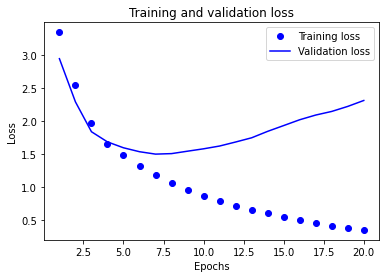

In [343]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

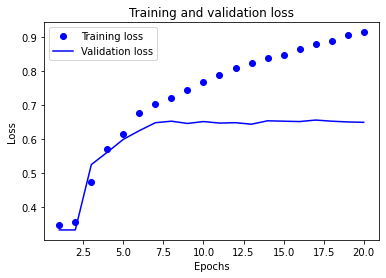

In [344]:
plt.plot(epochs, acc, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [345]:
val_acc[-1]

0.6484983563423157

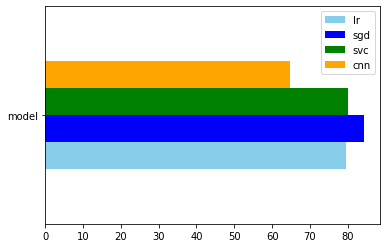

In [346]:
accs = np.array([[acc_lr,acc_sgd,acc_svc,val_acc[-1]*100]]).reshape(-1,1)
pd.DataFrame(accs.T,columns=['lr','sgd','svc','cnn'],index = ['model']).plot.barh(color = ['skyblue','blue','green','orange'],)
plt.legend(['lr','sgd','svc','cnn'])


- 결과적으로 분류 모델이 딥러닝 모델보다 더 높은 성능을 보였다
- 이 데이터셋에서는 분류 모델이 우수한 성능을 보여줬지만, 텍스트의 복잡한 관계를 효과적으로 학습하는 데에는 딥러닝이 더 적합할 것 같다. 하지만, 이는 데이터의 특성 및 규모에 따라 다를 수 있으므로 추가 실험이 필요할 것 같다
- CNN 결과의 미흡한 점은 훈련 손실과 검증 손실 간의 큰 차이에서 나타난다. 이러한 과적합 문제를 해결하기 위해 드롭아웃 레이어를 추가하거나 모델의 복잡성을 줄이는 등의 방법을 고려할 수 있다.
- 현재는 동일한 데이터 처리를 위해서 단순한 처리 과정으로 진행했지만, CNN의 성능을 향상시키기 위해서는 다양한 전처리 기법을 적용하고 모델의 레이어 및 하이퍼파라미터를 최적화하는 과정이 필요하다. Embedding 레이어의 차원을 조절하거나, 드롭아웃 레이어를 추가하며, 다양한 커널 크기를 사용하는 등의 실험을 통해 모델을 개선해야 좋은 성능을 낼 수 있을 것 같다.